In [2]:
%load_ext autoreload
%autoreload 2

# Compare 3T model with GaInP/GaAs s-type data
## Example WB417 from Geisz, et al., Cell Reports Physical Science 2, p. 100677 (2021) 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pvcircuit as pvc
import ipywidgets as widgets
from pvcircuit.PlotWithControls import PlotsWithControls
#%matplotlib inline
#import ipympl
%matplotlib widget

In [4]:
A=0.25
Aratio=0.89
# data iv3T vs V
path = pvc.notebook_datapath
fileA = 'WB417n8Cdark_CZ_JA.csv'
fileB = 'WB417n8Cdark_CZ_JB.csv'
WB417dark_V_dataiv = pvc.IV3T.from_csv('WB417_V_dataiv',path,fileA,fileB,'V','CZ', area=A) #Iscale=1000./A) # data iv3T vs V
fileA = 'WB417n8_Cpapy_CZ_JA.csv'
fileB = 'WB417n8_Cpapy_CZ_JB.csv'
WB417_V_dataiv = pvc.IV3T.from_csv('WB417_V_dataiv',path,fileA,fileB,'V','CZ', area=A)
# data iv3T vs I
fileA = 'WB417n8_Cpapy_CZ_VA.csv'
fileB = 'WB417n8_Cpapy_CZ_VB.csv'
WB417_I_dataiv = pvc.IV3T.from_csv('WB417_I_dataiv',path,fileA,fileB,'I','CZ', area=A)

In [5]:
# model
WB417dev3T = pvc.Tandem3T()
WB417dev3T.set(name='WB417dev3T', Rz = 2.3)
WB417dev3T.top.set(Eg=1.87, J0ratio=[ 80., 22.], Jext=0.0131, Gsh=1e-8, area=A)
WB417dev3T.top.RBB_dict={'method':'JFG', 'mrb':10., 'J0rb':1e-4, 'Vrb':0.}
WB417dev3T.bot.set(Eg=1.419, J0ratio=[10., 15.], Jext=0.0128, Gsh= 5e-5,pn=1)
WB417dev3T.bot.set(Rser=0.2, beta=5, area=A*Aratio)
WB417dev3T.bot.RBB_dict={'method':'JFG', 'mrb':10., 'J0rb':0.5, 'Vrb':0.}
# special points of model
#WB417_CZ_fitsp = WB417dev3T.specialpoints(meastype = 'CZ')  # calculate special points of fit
#WB417_CZ_fitsp.set(name='WB417_CZ_V_fitsp')
#WB417_CZ_fitsp
#pltargs={'lw':0, 'ms':7, 'mew':1, 'mec':'black', 'marker':'o', 'label':'fitsp', 'zorder':5}

In [6]:
plt.rcdefaults()
plt.rcParams.update({
        "savefig.dpi": 300,     # higher resolution output.
     })

In [7]:
# ui, Vax, Iax = WB417dev3T.controls(WB417_V_dataiv, WB417_I_dataiv, WB417dark_V_dataiv, hex=False)
# ui

pwc = PlotsWithControls(WB417dev3T,WB417_V_dataiv, WB417_I_dataiv, WB417dark_V_dataiv, hex=False)
ui = pwc.ui
ui

In [8]:
VM11, MPP11 = WB417dev3T.VM(1,1)
VM21, MPP21 = WB417dev3T.VM(2,1)
VM31, MPP31 = WB417dev3T.VM(3,1)
VM41, MPP41 = WB417dev3T.VM(4,1)
VM32, MPP32 = WB417dev3T.VM(3,2)
VM43, MPP43 = WB417dev3T.VM(4,3)
CM, MPPCM = WB417dev3T.CM()
sp = WB417dev3T.specialpoints()
sp.append(MPP11)
sp.append(MPP21)
sp.append(MPP31)
sp.append(MPP41)
sp.append(MPP32)
sp.append(MPP43)
sp.append(MPPCM)
sp

WB417dev3T SpecialPoints: <pvcircuit.iv3T.IV3T class>
{'name': 'WB417dev3T SpecialPoints', 'meastype': 'CZ', 'area': 0.25, 'shape': (13,)}
sizes(13, 13)

       #          mIro     mIzo     mIto     Vzt      Vrz      Vtr      mIA      mIB       VA       VB     mPtot    mIxhex   mIyhex   Vxhex    Vyhex  
      Voc3       0.00     0.00     0.00     1.442    1.044   -2.485    0.00     0.00     1.044   -1.442    0.00     0.00     0.00     2.777    1.205  
      Isc3       -2.85    -0.43    3.27     0.000    0.000   0.000     -2.85    3.27     0.000    0.000    0.00     -4.33    -0.50    0.000    0.000  
     VrzIto      -2.94    2.94     0.00     1.469   0.000    -1.469    -2.94    0.00    0.000    -1.469    0.00     -2.08    3.40     2.077   0.000   
     VztIro      0.00     -3.27    3.27    0.000     1.073   -1.073    0.00     3.27     1.073    0.000    0.00     -2.32    -3.78    0.758    1.238  
     VtrIzo      -3.14    0.00     3.14     1.309   -1.310    0.001    -3.14    3.14    -1.

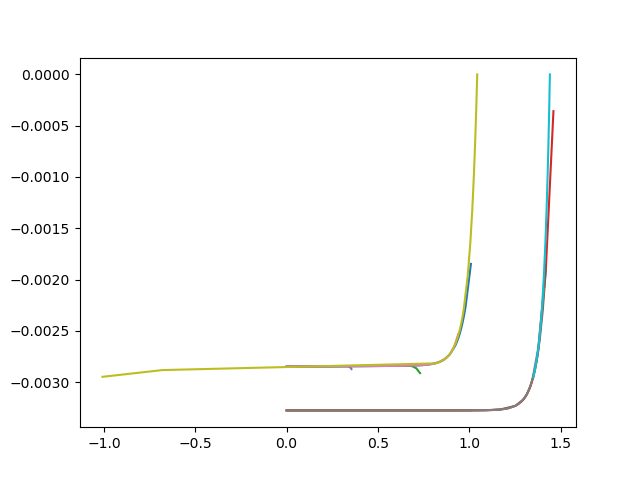

In [9]:
dfig, dax = plt.subplots()
dax.plot(VM11.VA, VM11.IA)
dax.plot(-VM11.VB, -VM11.IB)
dax.plot(VM21.VA, VM21.IA)
dax.plot(-VM21.VB, -VM21.IB)
dax.plot(VM41.VA, VM41.IA)
dax.plot(-VM41.VB, -VM41.IB)
dax.plot(VM32.VA, VM32.IA)
dax.plot(-VM32.VB, -VM32.IB)
dax.plot(CM.VA, CM.IA)
dax.plot(-CM.VB, -CM.IB)

In [10]:
# plot dark currents as map
plt.ioff()
Tax, Tobj = WB417dark_V_dataiv.plot(zkey='Ito', log=True, cmap='turbo')
Bax, Robj = WB417dark_V_dataiv.plot(zkey='Iro', log=True, cmap='turbo')
Lout = widgets.Output()
Rout = widgets.Output()
ToutBox = widgets.HBox([Lout, Rout])
with Lout:
    Tax.get_figure().show()
with Rout:
    Bax.get_figure().show()
plt.ion()
ToutBox